In [15]:
#  string
import string
from collections import Counter
from random import choice, randint, random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


- write a thing about the pylab variables
- Have a Chapter title
- We were demonstrate this with this Garden


- OBJECTS SECTION
- CLASS(same as type) --> OBJECT(instance) --> Attributes(variables) --> Methods






- explain the list comprehention a bit
- Explain the plotting part
- re-write the condition in more imperative style
- do random.choice rather than choice



# Introduction to Object Oriented Programming

Creating a **class** means defining a data type containg it's own variables (attributes) and functions (methods). Let's take for example the built-in python type *str*: it has it's own methods such as .lower() and .strip(). Creating an object is like creating your own variable type. **Class** describes the abstract characteristics of some sort of thing that we wish to **model** and an **object** is an actual instance of a class e.g. *3* is an instance of the class *integer* or an actual strawberry cake can be thought of as an instance of the strawberry cake recipe "class". The set of values of the attributes of a particular object is called its **state**. So the strawberry cake when its made is yummy and fresh, but as time passes by it state becomes rotten unfortunately. The terms object and instance are normally used synonymously. We will go through all these concepts in detail through the implementation of the Garden World. 

## The Garden World

We will learn object orientation today through a simple example. We are going to implement a Garden that has Plants in it and there is going to be a Gardener whose job will be to take care of our Plants. What we will build is a simplistic **model** of some real world phenomena. We will also implement a little simulation to observe how the laziness of the gardener affects the amount of plants in the garden.

## Plant

First let us define the Plant class. When a Plant is **instantiated** ("born") it comes with the following **attributes**:

+ Name --> random generated
+ Age = 0
+ Energy = 100
+ alive  = True


In [72]:
class Plant():
    
    def gen_name(self, specie, size=6, chars=string.ascii_uppercase + string.digits):
        """ Random name generator """
        return ''.join(choice(chars) for _ in range(size))+specie
    
    def __init__(self):
        """
        Initialize plants with name, age, energy, alive state
        """
        self.name = self.gen_name('_plant')
        self.age = 0
        self.energy = 50
        self.alive = True
        
    def get_older(self):
        self.age += 1
        self.energy -= 1
        if self.energy <= 0:
            self.alive = False
        
    def __str__(self):
        return "Name: {}\nAge: {}\nEnergy: {}\nAlive: {}".format(self.name,
                                                     self.age,
                                                     self.energy,
                                                     self.alive)

### Methods, attributes and *self*

Every Plant() has a unique idetifier or a "name" that it generates for itself with it's gen\_name() method. This method takes a bunch of arguments: 

+ specie: string describing the type of the plant
+ size  : integer of the length of the generated name
+ chars : list of characters to use for the generation

Calling this function changes the **state** of the Plant, by giving it a name.

Additionally it takes the *self* argument, which refers to the Plant object itSELF. As you can see the word *self* appears a lot in the class definition, all attributes are defined by the *self.attribute* syntax, these describe the state of the Plant.


Now let's take a look at the special  **\_\_init\_\_**  method. This is the method that is called, when the object is **instantiated/initialized/created** at runtime. In case of the Plant we use it to set the  default for self.name, self.age and self.alive. To initialize the name of the plant we call the gen\_name method.

Another important method of the Plant is get\_older(). If the this method is called

    plant = Plant()
    p.get_older()

the age of the plant increases and its energy decreases (this is how life works in this small garden-world).

In [73]:
plant = Plant() # initialize a Plant() object and call it "plant"
print plant

Name: S17P4Y_plant
Age: 0
Energy: 50
Alive: True


As you can see the Plant also has a special **\_\_str\_\_** method. This tells Python what to return when the user says

    print plant
    
we could also choose to return anything else, such as [1,2,3] or "yee".

In [74]:
plant = Plant() # initialize a Plant() object and call it "plant"
print plant

for i in range(10):
    plant.get_older() # call get older
    
print "\n",plant

Name: PVTF61_plant
Age: 0
Energy: 50
Alive: True

Name: PVTF61_plant
Age: 10
Energy: 40
Alive: True


If we call get_older() 10 times on our Plant it's age increases to 10 and its energy decreases to 90. We can access these properties with the object.attribute syntax.

In [75]:
print plant.age, plant.energy

10 40


Make sure that the plant dies if its energy is 0 (sad, but realistic).

In [76]:
plant = Plant() # initialize a Plant() object and call it "plant"
for i in range(100):
    plant.get_older() # call get older
    
print "\n",plant


Name: EBB1LQ_plant
Age: 100
Energy: -50
Alive: False


### Excersize

Add color as an attribute to Plant, with default value "green". In get\_older() implement a condition that checks if the Plant's energy is below or equal to 10% and if so turn it's color to "brown". Don't forget to add color to the \_\_str\_\_ method. Test the new feature of the Plant!

In [77]:
# edit the original code on top of the notebook and write your test-code here


### Inheritance

Let's say we would like to make a class similar to our original Plant, but different in certain ways. Object Oriented Programming has the concept of **inhertiance** that allows you to make a new class inherit all the original methods and attributes from another class, but you can still give the new class its own properties to extend its functionality or modify the original class. Below we define the Bush class, which is exactly the same as Plant, except it generates it's own name with the suffix "\_bush' instead of "\_plant".

In [78]:
class Bush(Plant):
    def __init__(self):
        Plant.__init__(self) # Calling the original Plat __init__
        self.name = self.gen_name('_bush') # changing the functionality

In [79]:
bushy = Bush()
print bushy

Name: HL9D5Q_bush
Age: 0
Energy: 50
Alive: True


### Exercize

Implement Orchid that only has energy of 10, it's default color is and has "\_orchid" as suffix in it's name.

In [80]:
# your code here; test your code!

## Garden

Cool, now  that we have the plants done let's get to the Garden(). The Garden is going to be an interesting object as it will have more objects in it. The Garden() object has only one attribute self.flora: it is a list, which is going to hold all objects of type plant. This is an example how we can use here object orientation to **MODEL**: a garden is something that has plants in it ergo Garden() has a list that has Plant() objects as elements. Fairly starightforward. The Garden() object also has the method grow_plant(), which adds an additional plant to the self.flora list. The most complicated part that the Garden() can handle is in it's life_cycle() method. If you call .life_cycle() the Garden() loops through all of its Plant() objects and calls their get_older(). The idea here is pretty straightforward as well: we use the Garden() object to deal with the plants. Additionally if a plant has died it removes it from the self.flora. This way in our main program we do not need to manage the individual Plants, they are *encapsulated* in the Garden. 

In [81]:
class Garden():
    def __init__(self):
        self.flora = []
         
    def grow_plant(self):
        self.flora.append(Plant())
        
    def life_cycle(self):
        """
        Go through all the plants and cal get_older()
        if a plant has died, remove it from the flora
        """
        for plant in self.flora:
            plant.get_older()
            if plant.alive == False:
                self.flora.remove(plant)
                
    def __getitem__(self,ind):
        """ Allows for indexing into the Garden """
        return self.flora[ind]
                
    def __iter__(self):
        """ Allows for looping over the Garden """
        return iter(self.flora)

    def __str__(self):
        """ Print self.flora as a string """
        return "Plants: {}".format([x.name for x in self.flora])
    

Let's checkout some of the Garden's functionality. So let's create an **instance** of the Garden **class** and plant 10 plants.

In [82]:
garden = Garden()
for i in range(10): # call .grow_plant() 10 times
    garden.grow_plant()
print garden

Plants: ['GNJ4EN_plant', '3NZ94A_plant', '5G5CLE_plant', '5NIQJR_plant', 'AN9Y0S_plant', 'ZHVHWL_plant', '05S6GJ_plant', 'Z7FM0J_plant', 'E9A0VS_plant', 'SQD37G_plant']


So far we have seen 2 of the methods of the Garden in action: 

+ .grow\_plant() adds a single Plant objects to self.flora
+ \_\_str\_\_ returns a string containing the list of names of the plants 

### Exercize

Change the grow\_plant() method such that it takes and optional argument: the number of plants to grow. The default number should be 1.

In [83]:
# test you code here


As you can see there are 4 special methods in Garden \_\_init\_\_, \_\_getitem\_\_ , \_\_iter\_\_ and \_\_str\_\_. We have already talked about \_\_init\_\_ that gets called everytime an object of the given class gets initialized. We have also mentioned \_\_str\_\_ that gets called by the print function, but actually also by str(). What we haven't talked about are \_\_iter\_\_ and \_\_getitem\_\_. As the previously mentioned functions these are also used to implement a class that emulates built-in python types. The method \_\_iter\_\_ allows to use the python syntax
    
    for element in object:

for any arbitrary class, while \_\_getitem\_\_ implements the functionality

    object[index]
    
Here we just return self.flora as an interable for \_\_iter\_\_ and index into self.flora with \_\_getitem\_\_.

In [84]:
print garden.flora

[<__main__.Plant instance at 0x7f9b40b00830>, <__main__.Plant instance at 0x7f9b40a183b0>, <__main__.Plant instance at 0x7f9b40a18758>, <__main__.Plant instance at 0x7f9b40a187e8>, <__main__.Plant instance at 0x7f9b40924b90>, <__main__.Plant instance at 0x7f9b40924fc8>, <__main__.Plant instance at 0x7f9b40924ea8>, <__main__.Plant instance at 0x7f9b40924d88>, <__main__.Plant instance at 0x7f9b40924dd0>, <__main__.Plant instance at 0x7f9b40924cb0>]


In [85]:
for i in garden: # loop over garden --> yields its plants --> print plant --> calls its __str__
    print i, '\n'

Name: GNJ4EN_plant
Age: 0
Energy: 50
Alive: True 

Name: 3NZ94A_plant
Age: 0
Energy: 50
Alive: True 

Name: 5G5CLE_plant
Age: 0
Energy: 50
Alive: True 

Name: 5NIQJR_plant
Age: 0
Energy: 50
Alive: True 

Name: AN9Y0S_plant
Age: 0
Energy: 50
Alive: True 

Name: ZHVHWL_plant
Age: 0
Energy: 50
Alive: True 

Name: 05S6GJ_plant
Age: 0
Energy: 50
Alive: True 

Name: Z7FM0J_plant
Age: 0
Energy: 50
Alive: True 

Name: E9A0VS_plant
Age: 0
Energy: 50
Alive: True 

Name: SQD37G_plant
Age: 0
Energy: 50
Alive: True 



## The Lazy Gardener Simulation

We now have Garden that has some Plant objects in it, we are ready to do a little simulation! The cell below implements the Gardener class. In the \_\_init\_\_ you see that instances of the Gardener class are instantiated with a *garden* that they take care of and they have a certain level of diligence. This diligence comes into pay in the .decide() method, where the gardener decides if he wants to work or not. It is implemented as I simple coin toss, where 1 correspond to work and 0 to don' work. The trick here is that we bias the coin-toss by diligence. The most important method here is work(). In this method the Gardener decides to work or not and if he decides 1, then he asks the garden to grow a plant and chooses a random plant that he gives +10 energy to (waters it).

In [111]:
class Gardener():
    def __init__(self, garden, diligence=0.5):
        """ 
        :self.garden: Garden object you take care of
        :self.diligence: how likely it is that you do something
        """
        self.garden = garden
        self.diligence = diligence
    
    def decide(self):
        """ Coin toss biased by diligance """
        return 1 if random.random() < self.diligence else 0
    
    def place_plant(self):
        self.garden.grow_plant()
        
    def work(self):
        """ 
        Throw a coin
        if 1: place a plant and choose random plant to water
        else: do nothing
        """
        if self.decide() == 1: # coin-flip for planting a plant
            self.place_plant()
        if self.decide() == 1: # coin-flip for watering a plant
            candidate_plant = choice(garden.flora)
            candidate_plant.energy += 10

Now, depending on the gardeners diligence there is going to be a different amount of plants in the garden. If the gardener is lazy the plants will die off faster and there is going to be a low number of plants in the garden overall. Conversly, if he is very diligent the number of plants in the garden is going to be huge. The cells below implement the experiment, study them a bit, try different diligince scores and interpret the results.

In [116]:
stats = [] # number of plants after 100 rounds
diligence = 0.6  # diligence of the gardener
# Do 100 rounds of simulation
for i in range(1000):
    garden = Garden() # initialize garden
    gardener = Gardener(garden, diligence)  # initialize gardener
    gardener.place_plant() # plant the first plant
    # Do 1000 turns of Garden World
    for i in range(100):
        gardener.work() # ask the gardener to work
        garden.life_cycle() # take care of the Plants' life cycle
    stats.append(len(garden.flora)) # after 1000 rounds how many plants stayed alive?

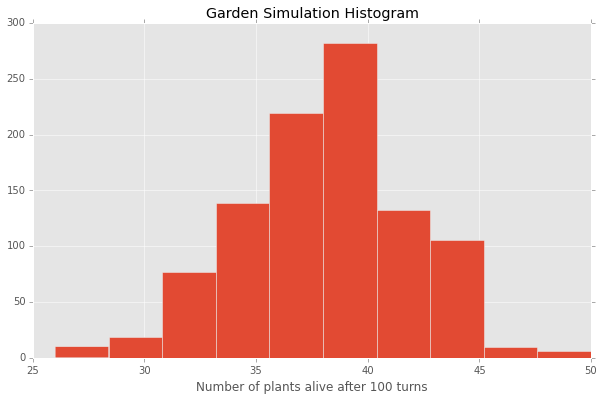

In [117]:
plt.style.use('ggplot')                                    # using a specific style for plotting
figure(figsize=(10,6))                                     # increasing the default figure size
hist(stats)                                                # plotting the histogram
plt.title("Garden Simulation Histogram")                   # Giving the plot a title
plt.xlabel("Number of plants alive after 100 turns")      # Giving the plot an x label

### Exersize

The work() method of the Gardener class is implemented in a slightly sloppy way. It uses this line 

    candidate_plant.energy += 10

to water the plant, which makes sense, but it might not be easy to remember what that means let's say 2 weeks after the implementation. First implement a replenish() method in Plant and then a water() method in Gardener. The water() method should call plant.replenish() and replenish() should increase the plants energy by 10. 

After fixing the Gardener implement a SmartGardener, who only waters plants that have "brown" as color. He should inherit from the Gardener class.

In [33]:
# code for SmartGardener